***Thêm các thư viện cần thiết***

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. ĐỌC DỮ LIỆU

In [50]:
# Hiển thị biểu đồ rõ nét hơn
plt.rcParams['figure.dpi'] = 100
df = pd.read_csv('diem_thptqg_2019.csv')
df

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH
0,3000001,4.8,6.50,3.8,NaN,NaN,NaN,NaN,4.25,6.50,8.75,6.50
1,3000002,3.0,2.25,NaN,NaN,NaN,NaN,NaN,2.75,3.00,NaN,NaN
2,3000003,3.2,2.50,NaN,NaN,NaN,NaN,NaN,2.25,3.75,NaN,NaN
3,3000004,5.8,3.25,NaN,NaN,NaN,NaN,NaN,2.50,5.50,NaN,NaN
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,NaN,NaN,NaN,NaN,5.00,6.00,7.50,6.17
18481,3018572,4.4,7.00,3.6,NaN,NaN,NaN,NaN,3.50,6.25,6.75,5.50
18482,3018573,5.8,5.00,2.8,NaN,NaN,NaN,NaN,2.75,4.50,5.50,4.25
18483,3018574,5.8,4.00,2.8,NaN,NaN,NaN,NaN,5.50,6.50,8.25,6.75


Kiểm tra kiểu dữ liệu của thuộc tính và dữ liệu bị thiếu (Missing value)

In [51]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18485 entries, 0 to 18484
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   So Bao Danh  18485 non-null  int64  
 1   Toan         18456 non-null  float64
 2   Ngu Van      18256 non-null  float64
 3   Ngoai Ngu    16819 non-null  float64
 4   Vat Ly       6700 non-null   float64
 5   Hoa Hoc      6731 non-null   float64
 6   Sinh Hoc     6645 non-null   float64
 7   KHTN         6571 non-null   float64
 8   Lich Su      11682 non-null  float64
 9   Dia Ly       11601 non-null  float64
 10  GDCD         10229 non-null  float64
 11  KHXH         10229 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.7 MB
None


- Nhận xét: Kiểu dữ liệu đã chính xác. Không cần chỉnh sửa kiểu dữ liệu của các thuộc tính. Nhiều dữ liệu thiếu do thí sinh đăng kí các khối thi khác nhau.

# 2. TIỀN XỬ LÝ DỮ LIỆU

## 2.1 Thêm cột "Số Môn Thi"

Thêm vào cột "Số Môn Thi" để thống kê một thí sinh thi bao nhiêu môn

In [52]:
# Các môn thi
list_of_subjects = ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc', 'Lich Su', 'Dia Ly', 'GDCD']

In [53]:
df['So Mon Thi'] = df[list_of_subjects].notna().sum(axis=1).tolist()
df

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So Mon Thi
0,3000001,4.8,6.50,3.8,NaN,NaN,NaN,NaN,4.25,6.50,8.75,6.50,6
1,3000002,3.0,2.25,NaN,NaN,NaN,NaN,NaN,2.75,3.00,NaN,NaN,4
2,3000003,3.2,2.50,NaN,NaN,NaN,NaN,NaN,2.25,3.75,NaN,NaN,4
3,3000004,5.8,3.25,NaN,NaN,NaN,NaN,NaN,2.50,5.50,NaN,NaN,4
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,NaN,NaN,NaN,NaN,5.00,6.00,7.50,6.17,6
18481,3018572,4.4,7.00,3.6,NaN,NaN,NaN,NaN,3.50,6.25,6.75,5.50,6
18482,3018573,5.8,5.00,2.8,NaN,NaN,NaN,NaN,2.75,4.50,5.50,4.25,6
18483,3018574,5.8,4.00,2.8,NaN,NaN,NaN,NaN,5.50,6.50,8.25,6.75,6


## 2.2 Làm Sạch Dữ liệu 

Thay các giá trị NaN với -1 (biểu thị thí sinh không thi môn đó)

In [54]:
df_clean = df.fillna(-1)

df_clean

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So Mon Thi
0,3000001,4.8,6.50,3.8,-1.0,-1.0,-1.00,-1.00,4.25,6.50,8.75,6.50,6
1,3000002,3.0,2.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.75,3.00,-1.00,-1.00,4
2,3000003,3.2,2.50,-1.0,-1.0,-1.0,-1.00,-1.00,2.25,3.75,-1.00,-1.00,4
3,3000004,5.8,3.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.50,5.50,-1.00,-1.00,4
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,-1.00,-1.00,-1.00,-1.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,-1.0,-1.0,-1.00,-1.00,5.00,6.00,7.50,6.17,6
18481,3018572,4.4,7.00,3.6,-1.0,-1.0,-1.00,-1.00,3.50,6.25,6.75,5.50,6
18482,3018573,5.8,5.00,2.8,-1.0,-1.0,-1.00,-1.00,2.75,4.50,5.50,4.25,6
18483,3018574,5.8,4.00,2.8,-1.0,-1.0,-1.00,-1.00,5.50,6.50,8.25,6.75,6


In [55]:
df_clean.to_csv("diem_thptqg_2019_clean.csv", index=False, encoding='utf-8-sig')

## 2.3 Kiểm tra dữ liệu ngoại lai (Outliers)

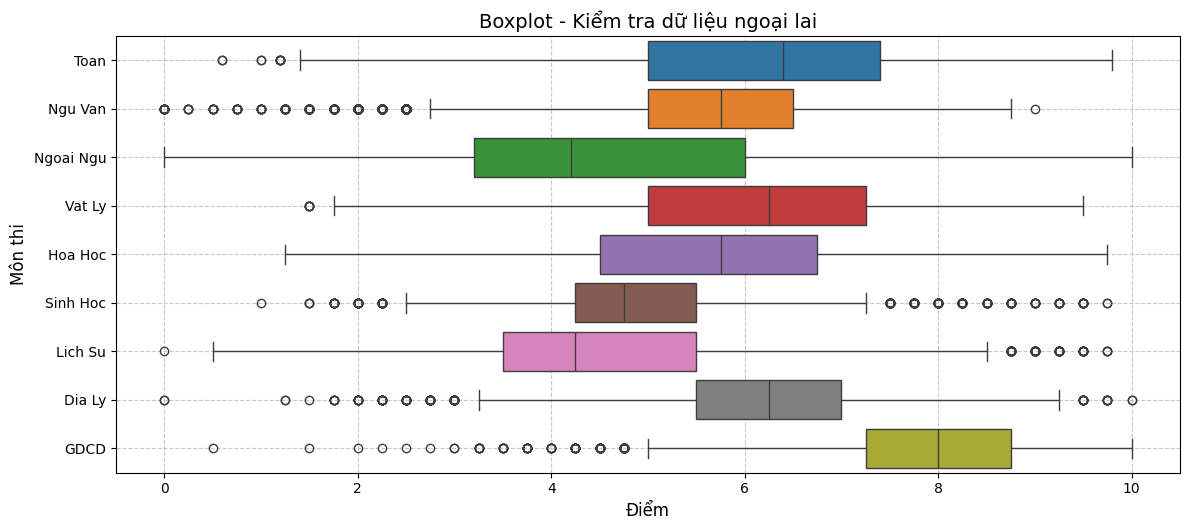

In [70]:
# Kiểm tra dữ liệu ngoại lai (Outliers) bằng phương pháp IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Quartile 1
    Q3 = data[column].quantile(0.75)  # Quartile 3
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) |
                    (data[column] > upper_bound)]
    return outliers


# Áp dụng kiểm tra ngoại lai cho từng cột trong danh sách các môn học
outliers_dict = {}
# Hiển thị từng môn học tuần tự
for subject, outliers in outliers_dict.items():
    print(f"--- Outliers in {subject} ---")
    if not outliers.empty:
        print(outliers)
    else:
        print("No outliers found.")
    print("\n")  # Thêm dòng trống để dễ đọc hơn
    input("Nhấn Enter để tiếp tục...")

# Vẽ boxplot để trực quan hóa dữ liệu ngoại lai
# Điều chỉnh chiều cao dựa trên số lượng môn học
plt.figure(figsize=(12, len(list_of_subjects) * 0.6))
sns.boxplot(data=df[list_of_subjects], orient="h")
plt.title("Boxplot - Kiểm tra dữ liệu ngoại lai", fontsize=14)
plt.xlabel("Điểm", fontsize=12)
plt.ylabel("Môn thi", fontsize=12)
plt.yticks(fontsize=10)  # Điều chỉnh kích thước nhãn môn học
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2.3.1 Hàm trực quan dữ liệu để tìm Outliers bằng biểu đồ Boxplot  

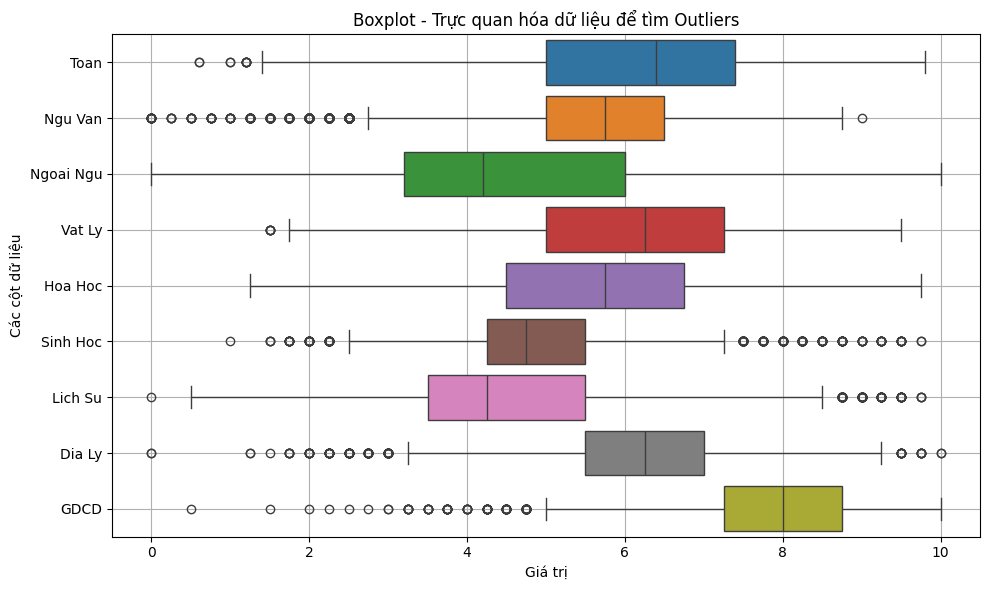

In [57]:
# Hàm trực quan dữ liệu để tìm Outliers bằng biểu đồ Boxplot
def visualize_outliers_boxplot(data, columns):
    """
    Trực quan hóa dữ liệu bằng biểu đồ Boxplot để tìm Outliers.
    
    Parameters:
        data (DataFrame): Dữ liệu cần kiểm tra.
        columns (list): Danh sách các cột cần vẽ Boxplot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data[columns], orient="h")
    plt.title("Boxplot - Trực quan hóa dữ liệu để tìm Outliers")
    plt.xlabel("Giá trị")
    plt.ylabel("Các cột dữ liệu")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Gọi hàm để trực quan hóa dữ liệu
visualize_outliers_boxplot(df, list_of_subjects)

# 3. THAO TAC DỮ LIỆU

## 3.2 Phần trăm thi mỗi môn của thí sinh

In [58]:
thi_toan = df_clean[df_clean['Toan'] >= 0].count()['Toan']
thi_van = df_clean[df_clean['Ngu Van'] >= 0].count()['Ngu Van']
thi_nn = df_clean[df_clean['Ngoai Ngu'] >= 0].count()['Ngoai Ngu']

thi_ly = df_clean[df_clean['Vat Ly'] >= 0].count()['Vat Ly']
thi_hoa = df_clean[df_clean['Hoa Hoc'] >= 0].count()['Hoa Hoc']
thi_sinh = df_clean[df_clean['Sinh Hoc'] >= 0].count()['Sinh Hoc']

thi_su = df_clean[df_clean['Lich Su'] >= 0].count()['Lich Su']
thi_dia = df_clean[df_clean['Dia Ly'] >= 0].count()['Dia Ly']
thi_gdcd = df_clean[df_clean['GDCD'] >= 0].count()['GDCD']

tong_thi_sinh = df_clean.count()['So Bao Danh']

subject = ['Toán', 'Ngữ Văn', 'Ngoại Ngữ', 'Vật Lý', 'Hóa Học', 'Sinh Học', 'Lịch Sử', 'Địa Lý',  'GDCD']

# Số thí sinh thi mỗi môn
no_of_stu = [thi_toan, thi_van, thi_nn, thi_ly, thi_hoa, thi_sinh, thi_su, thi_dia, thi_gdcd]

# Phần trăm thí sinh thi mỗi môn
ptram_thi = no_of_stu / tong_thi_sinh

*Dựng hình*

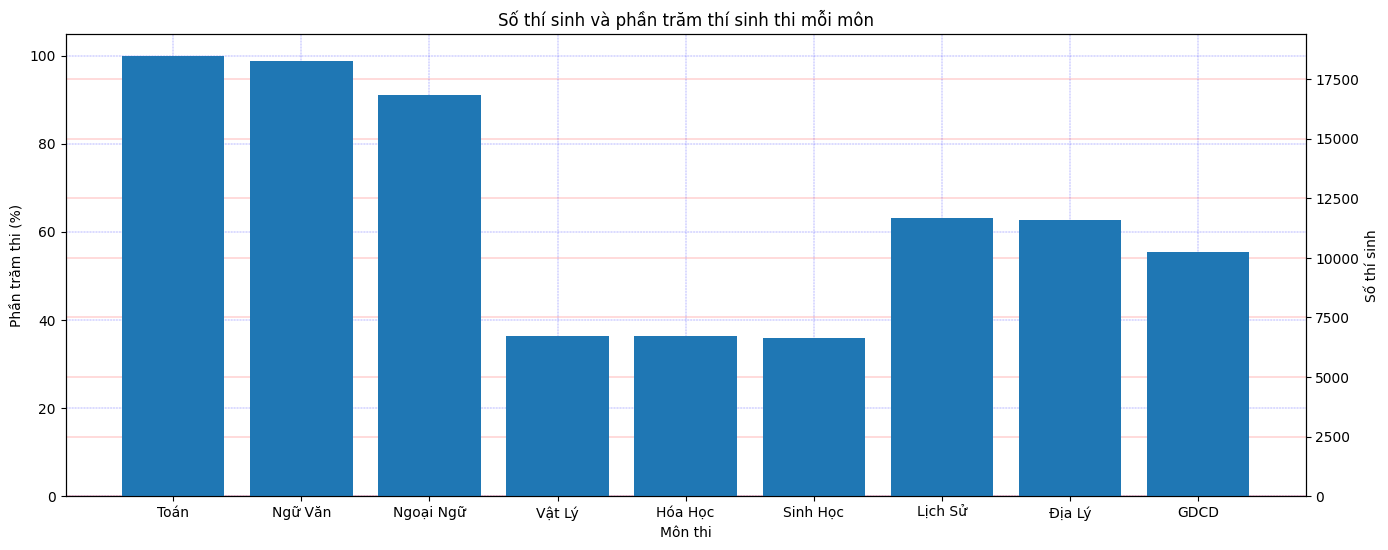

In [59]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(111)

ax1.bar(subject, ptram_thi * 100)
ax1.set_xlabel('Môn thi')
ax1.set_ylabel('Phần trăm thi (%)')
ax1.grid(color='b', ls='-.', lw = 0.2)
ax1.set_axisbelow(True)

# Biểu diễn chung 1 đồ thị
ax2 = ax1.twinx()

ax2.bar(subject, no_of_stu)
ax2.set_ylabel('Số thí sinh')
ax2.grid(color='r', ls='-', lw = 0.2)
ax2.set_axisbelow(True)

plt.title('Số thí sinh và phần trăm thí sinh thi mỗi môn')
plt.show()

**Kết luận từ dữ liệu:** 
- Thí sinh thi tổ hợp KHXH (Sử + Địa + GDCD) nhiều hơn thí sinh thi tổ hợp KHTN (Lý + Hóa + Sinh). 
- Toán và ngữ văn là các môn bắt buộc nên số thí sinh thi ở 2 môn này chênh lệch nhau không đáng kế

## 3.3 Số học sinh thi x môn

In [60]:
# Ensure the 'So Mon Thi' column exists
if 'So Mon Thi' not in df.columns:
	# Create the 'So Mon Thi' column if it doesn't exist
	list_of_subjects = ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc', 'Lich Su', 'Dia Ly', 'GDCD']
	df['So Mon Thi'] = df[list_of_subjects].notna().sum(axis=1).tolist()

cols = ['So Bao Danh', 'So Mon Thi']
thptqg_so_mon = df[cols].groupby('So Mon Thi').count().reset_index()
thptqg_so_mon = thptqg_so_mon.rename(columns={'So Bao Danh': 'So Thi Sinh'})
thptqg_so_mon

,So Mon Thi,So Thi Sinh
0,1,8
1,2,2
2,3,337
3,4,1347
4,5,127
5,6,16631
6,7,5
7,9,28


- Nhận xét: Các thí sinh phần lớn tham gia từ 3 đến 6 môn. Vậy nên ta sẽ nhóm các thí sinh ở các nhóm khác chung 1 nhóm là 'Other'

In [61]:
other = {'So Mon Thi': 'other', 'So Thi Sinh': thptqg_so_mon[thptqg_so_mon['So Thi Sinh'] < 100].sum()['So Thi Sinh']}
other

{'So Mon Thi': 'other', 'So Thi Sinh': 43}

Thêm row 'other' và xóa các row có số thí sinh < 100

In [62]:
# Xóa các hàng có số thí sinh thấp hơn 100
thptqg_so_mon = thptqg_so_mon.drop(thptqg_so_mon[thptqg_so_mon['So Thi Sinh'] < 100].index)

# Thêm hàng other
other_df = pd.DataFrame([other])  # Convert the dictionary to a DataFrame
thptqg_so_mon = pd.concat([thptqg_so_mon, other_df], ignore_index=True)

thptqg_so_mon

,So Mon Thi,So Thi Sinh
0,3,337
1,4,1347
2,5,127
3,6,16631
4,other,43


*Dựng hình*

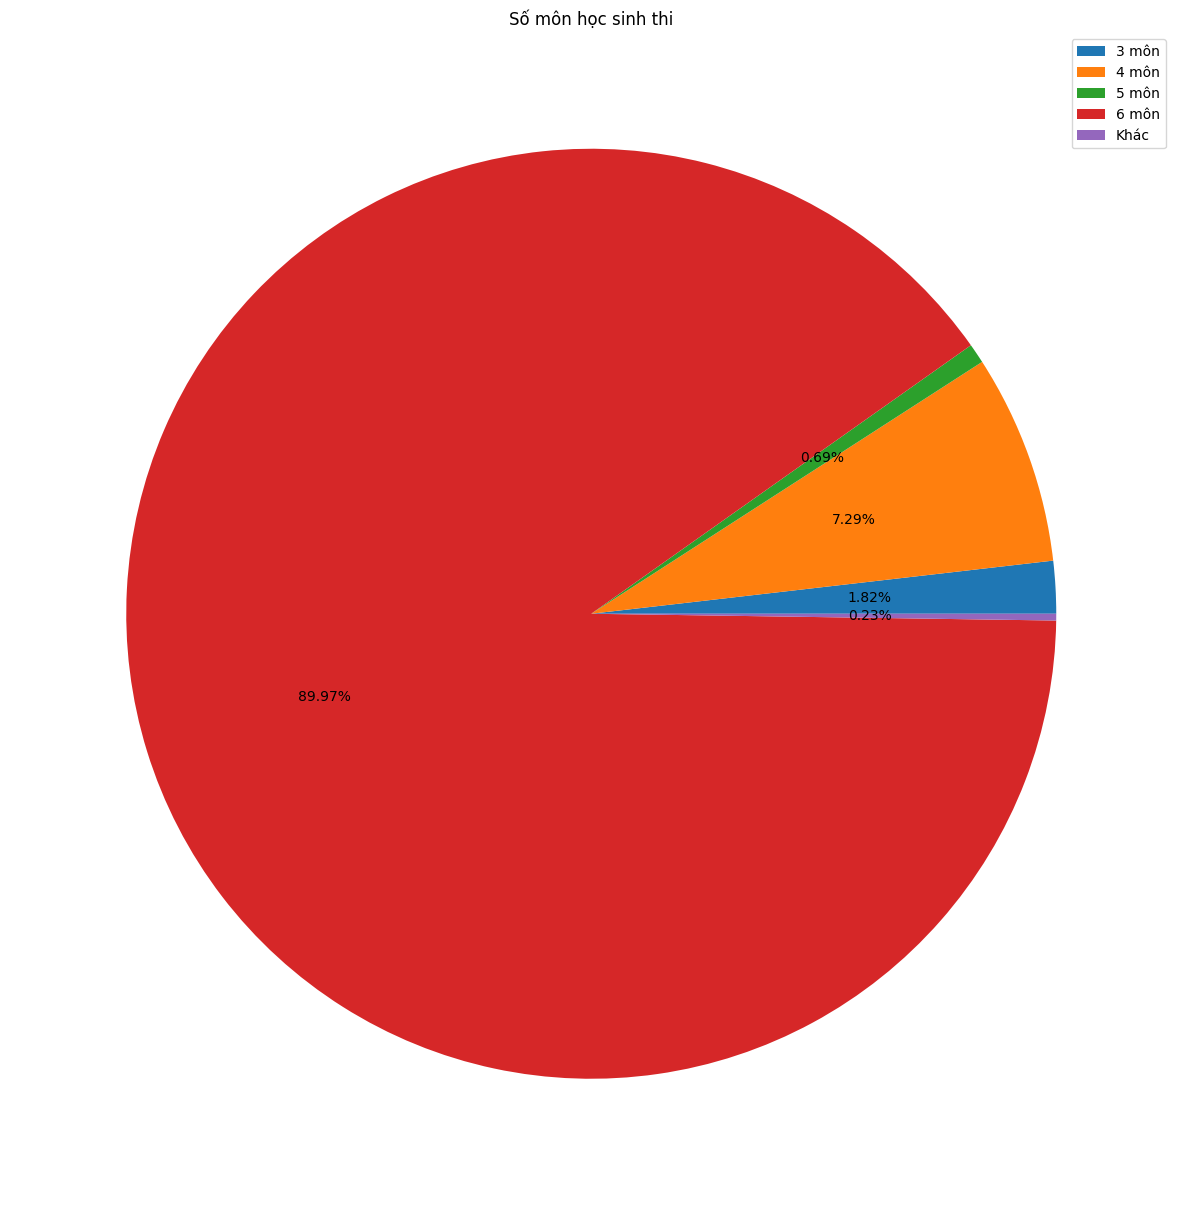

In [63]:
fig = plt.figure(figsize=(15, 18))
ax = fig.add_subplot(111)

ax.pie(thptqg_so_mon['So Thi Sinh'], autopct='%.2f%%')

ax.legend(labels=('3 môn', '4 môn', '5 môn', '6 môn', 'Khác'), loc='upper right')
plt.title('Số môn học sinh thi')

plt.show()

- Nhận xét: Đa số thí sinh thi đủ 6 môn (89,97%), chỉ ít số thí sinh thi không đủ (0,23%).

## 3.4 Điểm trung bình theo số lượng môn thi

In [64]:
# Copy bảng để tránh thao tác trên dữ liệu gốc
thptqg_avg = df_clean.copy()

# Tạo cột 'điểm trung bình'
thptqg_avg['Diem Trung Binh'] = thptqg_avg[thptqg_avg[list_of_subjects] >= 0].mean(axis=1).round(2).tolist()

thptqg_avg

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So Mon Thi,Diem Trung Binh
0,3000001,4.8,6.50,3.8,-1.0,-1.0,-1.00,-1.00,4.25,6.50,8.75,6.50,6,5.77
1,3000002,3.0,2.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.75,3.00,-1.00,-1.00,4,2.75
2,3000003,3.2,2.50,-1.0,-1.0,-1.0,-1.00,-1.00,2.25,3.75,-1.00,-1.00,4,2.92
3,3000004,5.8,3.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.50,5.50,-1.00,-1.00,4,4.26
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,-1.00,-1.00,-1.00,-1.00,6,5.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,-1.0,-1.0,-1.00,-1.00,5.00,6.00,7.50,6.17,6,5.58
18481,3018572,4.4,7.00,3.6,-1.0,-1.0,-1.00,-1.00,3.50,6.25,6.75,5.50,6,5.25
18482,3018573,5.8,5.00,2.8,-1.0,-1.0,-1.00,-1.00,2.75,4.50,5.50,4.25,6,4.39
18483,3018574,5.8,4.00,2.8,-1.0,-1.0,-1.00,-1.00,5.50,6.50,8.25,6.75,6,5.48


In [65]:
# Cột cần lấy
cols = ['So Mon Thi', 'Diem Trung Binh']

# Lấy điểm trung bình theo số môn thí sinh thi
thptqg_avg = thptqg_avg[cols].groupby('So Mon Thi').mean().round(2).reset_index()

thptqg_avg

,So Mon Thi,Diem Trung Binh
0,1,1.91
1,2,4.78
2,3,5.79
3,4,3.96
4,5,5.69
5,6,5.80
6,7,4.37
7,9,5.37


Do không có thí sinh nào thi 8 môn, thêm một hàng 8 môn có điểm trung bình là 0, biểu thị là không có thí sinh thi 8 môn.

In [66]:
# Tạo df mới có dữ liệu 8 - 0
add_df = pd.DataFrame({'So Mon Thi': 8, 'Diem Trung Binh': 0}, index=[6.5])

# Nối thptqg_avg với add_df
thptqg_avg = pd.concat([thptqg_avg, add_df], ignore_index=False)

# Sort lại thptqg_avg theo index
thptqg_avg = thptqg_avg.sort_index().reset_index(drop=True)

thptqg_avg

,So Mon Thi,Diem Trung Binh
0,1,1.91
1,2,4.78
2,3,5.79
3,4,3.96
4,5,5.69
5,6,5.80
6,7,4.37
7,8,0.00
8,9,5.37


In [67]:
# Thiết lập các tham số cần thiết
so_mon = thptqg_avg['So Mon Thi'].tolist()
diem_trung_binh = thptqg_avg['Diem Trung Binh'].tolist()

**Dựng hình**

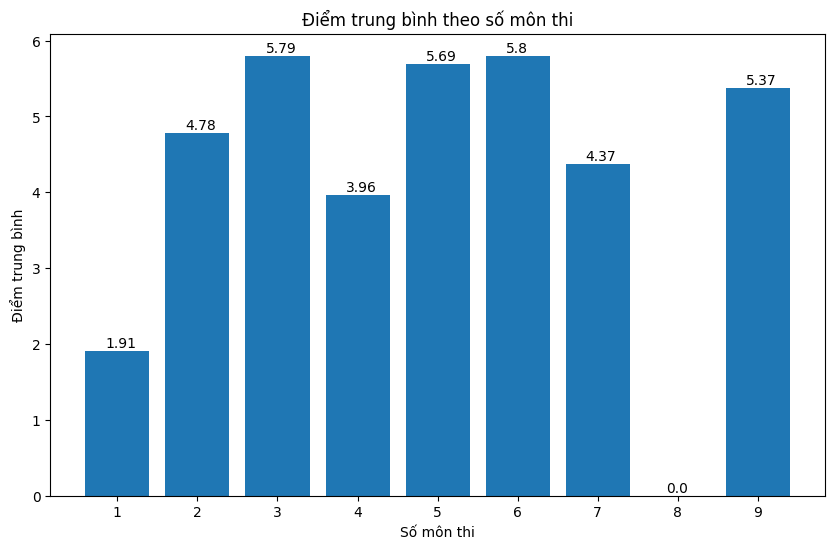

In [68]:
fig = plt.figure(figsize=(10, 6))
plt.bar(so_mon, diem_trung_binh)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel('Số môn thi')
plt.ylabel('Điểm trung bình')
plt.title('Điểm trung bình theo số môn thi')

# Thêm giá trị thực vào phía trên mỗi bar
for index, value in enumerate(diem_trung_binh):
    plt.text(index + 0.85, value + 0.05, str(value))

plt.show()

## 3.5 Phổ điểm và Violin plot của từng môn

=== Thống kê mô tả môn Toan ===
Số lượng: 18456
Điểm trung bình: 6.1
Điểm min: 0.6
Điểm max: 9.8
Độ lệch chuẩn: 1.66
----------------------------------------


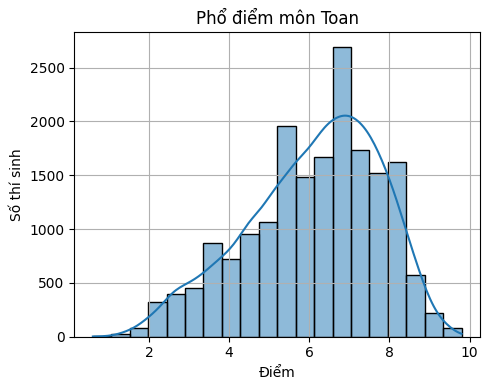

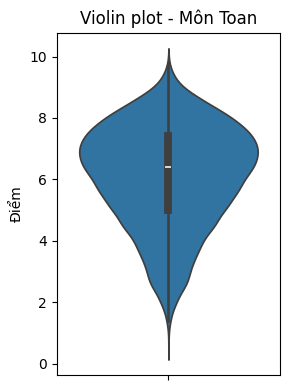



=== Thống kê mô tả môn Ngu Van ===
Số lượng: 18256
Điểm trung bình: 5.63
Điểm min: 0.0
Điểm max: 9.0
Độ lệch chuẩn: 1.34
----------------------------------------


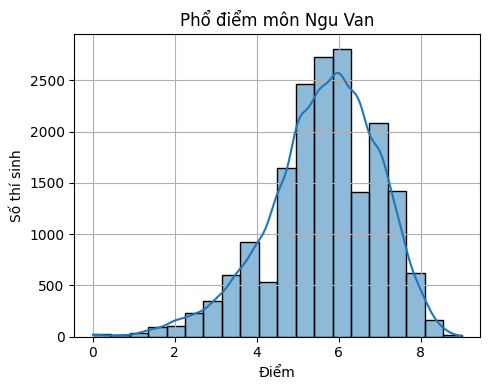

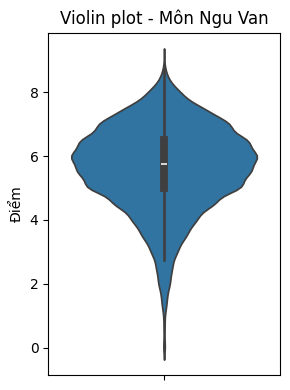



=== Thống kê mô tả môn Ngoai Ngu ===
Số lượng: 16819
Điểm trung bình: 4.7
Điểm min: 0.0
Điểm max: 10.0
Độ lệch chuẩn: 1.93
----------------------------------------


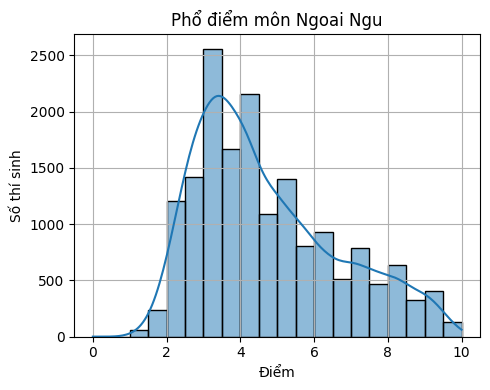

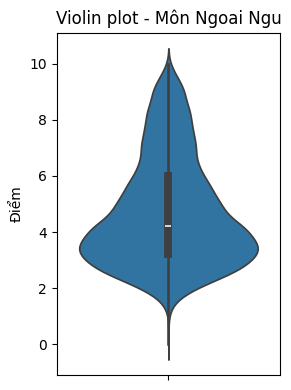



=== Thống kê mô tả môn Vat Ly ===
Số lượng: 6700
Điểm trung bình: 6.05
Điểm min: 1.5
Điểm max: 9.5
Độ lệch chuẩn: 1.49
----------------------------------------


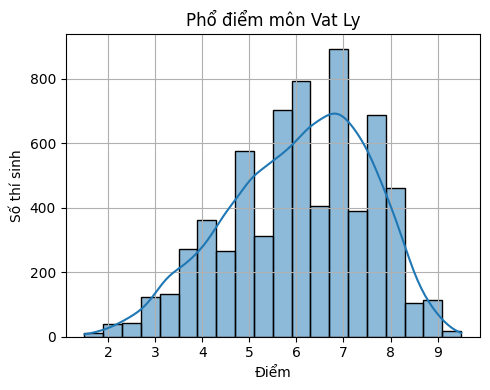

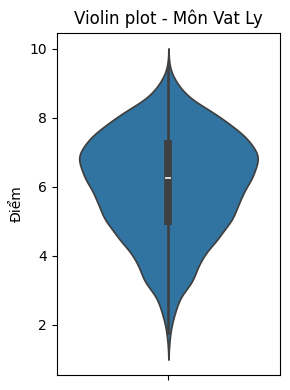



=== Thống kê mô tả môn Hoa Hoc ===
Số lượng: 6731
Điểm trung bình: 5.61
Điểm min: 1.25
Điểm max: 9.75
Độ lệch chuẩn: 1.52
----------------------------------------


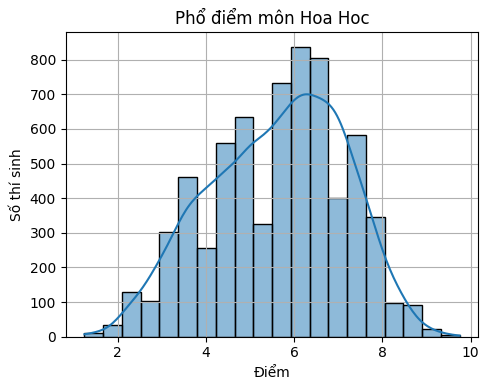

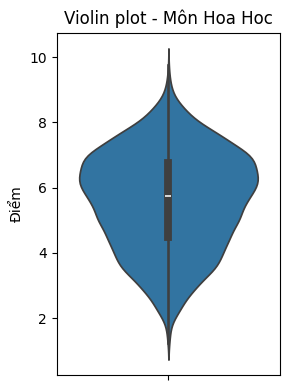



=== Thống kê mô tả môn Sinh Hoc ===
Số lượng: 6645
Điểm trung bình: 4.86
Điểm min: 1.0
Điểm max: 9.75
Độ lệch chuẩn: 1.14
----------------------------------------


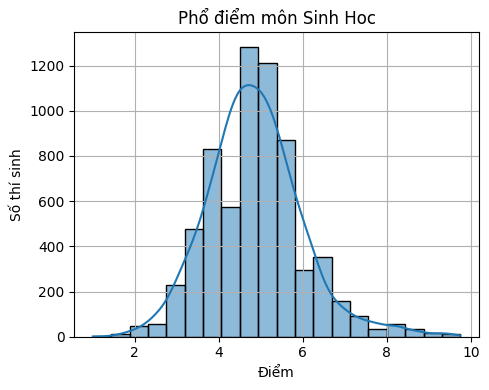

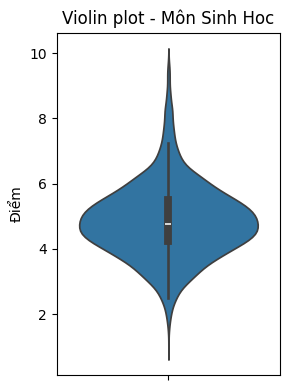



=== Thống kê mô tả môn Lich Su ===
Số lượng: 11682
Điểm trung bình: 4.49
Điểm min: 0.0
Điểm max: 9.75
Độ lệch chuẩn: 1.48
----------------------------------------


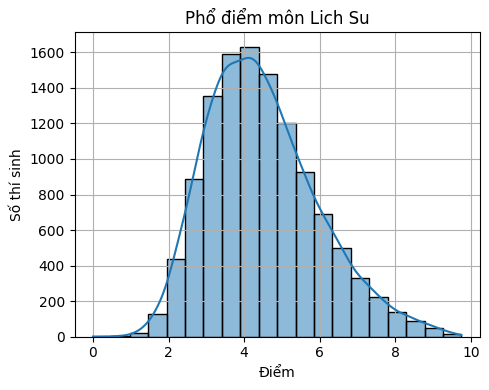

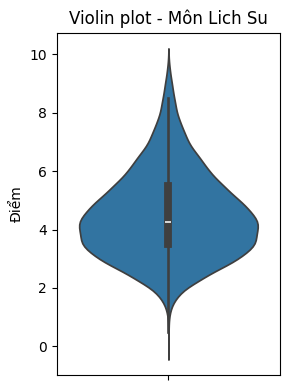



=== Thống kê mô tả môn Dia Ly ===
Số lượng: 11601
Điểm trung bình: 6.27
Điểm min: 0.0
Điểm max: 10.0
Độ lệch chuẩn: 1.2
----------------------------------------


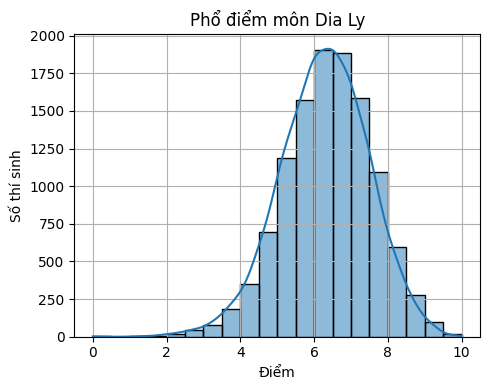

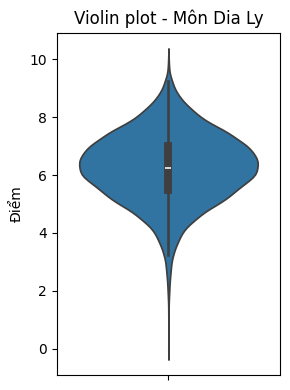



=== Thống kê mô tả môn GDCD ===
Số lượng: 10229
Điểm trung bình: 7.92
Điểm min: 0.5
Điểm max: 10.0
Độ lệch chuẩn: 1.11
----------------------------------------


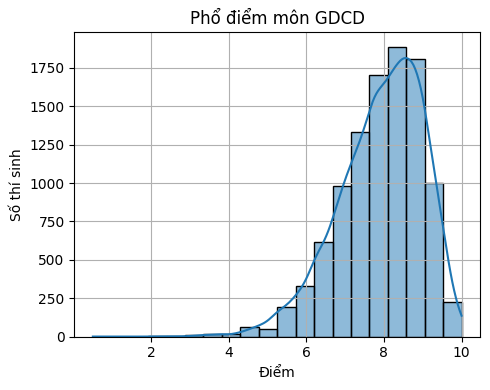

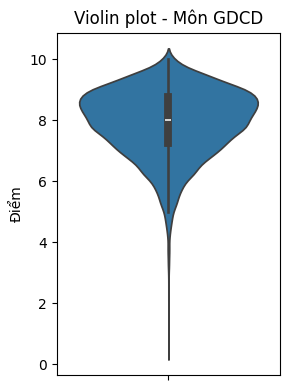

In [69]:
for c in list_of_subjects:
    # Kiểm tra xem có dữ liệu không (all NaN -> bỏ qua)
    if df[c].notna().sum() == 0:
        continue

    # 1. In thống kê mô tả cho môn c
    print(f"=== Thống kê mô tả môn {c} ===")
    print("Số lượng:", df[c].count())
    print("Điểm trung bình:", round(df[c].mean(),2))
    print("Điểm min:", df[c].min())
    print("Điểm max:", df[c].max())
    print("Độ lệch chuẩn:", round(df[c].std(),2))
    print("-"*40)

    # 2. Vẽ Histogram (phổ điểm)
    plt.figure(figsize=(5,4))
    sns.histplot(df[c], bins=20, kde=True)
    plt.title(f"Phổ điểm môn {c}")
    plt.xlabel("Điểm")
    plt.ylabel("Số thí sinh")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3. Vẽ Violin plot
    plt.figure(figsize=(3,4))
    sns.violinplot(y=df[c])
    plt.title(f"Violin plot - Môn {c}")
    plt.ylabel("Điểm")
    plt.tight_layout()
    plt.show()

    # Thêm khoảng trống hoặc gạch ngang để tách giữa các môn
    print("\n" + "="*60 + "\n")

voi lai cai hoc sau duoi nay 

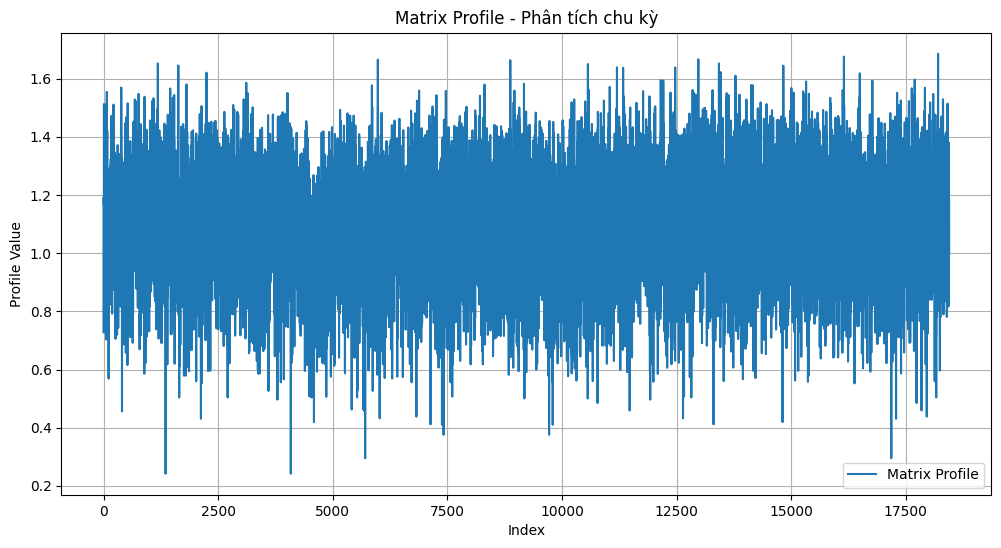

Chu kỳ lặp lại tốt nhất bắt đầu tại index 1351 và tương tự với index 4083


In [72]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Giả sử bạn có một cột dữ liệu chuỗi thời gian, ví dụ: 'Toan'
time_series = df['Toan'].dropna().values  # Loại bỏ giá trị NaN

# Tính toán Matrix Profile với độ dài chuỗi con (window size)
window_size = 10  # Độ dài chuỗi con, bạn có thể điều chỉnh
matrix_profile = stumpy.stump(time_series, m=window_size)

# Trích xuất giá trị Matrix Profile và vị trí
profile_values = matrix_profile[:, 0]  # Giá trị ma trận khoảng cách
profile_indices = matrix_profile[:, 1]  # Vị trí chuỗi con tương tự

# Vẽ biểu đồ Matrix Profile
plt.figure(figsize=(12, 6))
plt.plot(profile_values, label="Matrix Profile")
plt.title("Matrix Profile - Phân tích chu kỳ")
plt.xlabel("Index")
plt.ylabel("Profile Value")
plt.legend()
plt.grid(True)
plt.show()

# Xác định các chu kỳ lặp lại
min_index = np.argmin(profile_values)  # Vị trí chu kỳ lặp lại tốt nhất
print(f"Chu kỳ lặp lại tốt nhất bắt đầu tại index {min_index} và tương tự với index {profile_indices[min_index]}")

Phân tích clustering để tìm patterns

Cluster
1    11680
2     4316
0     2489
Name: count, dtype: int64


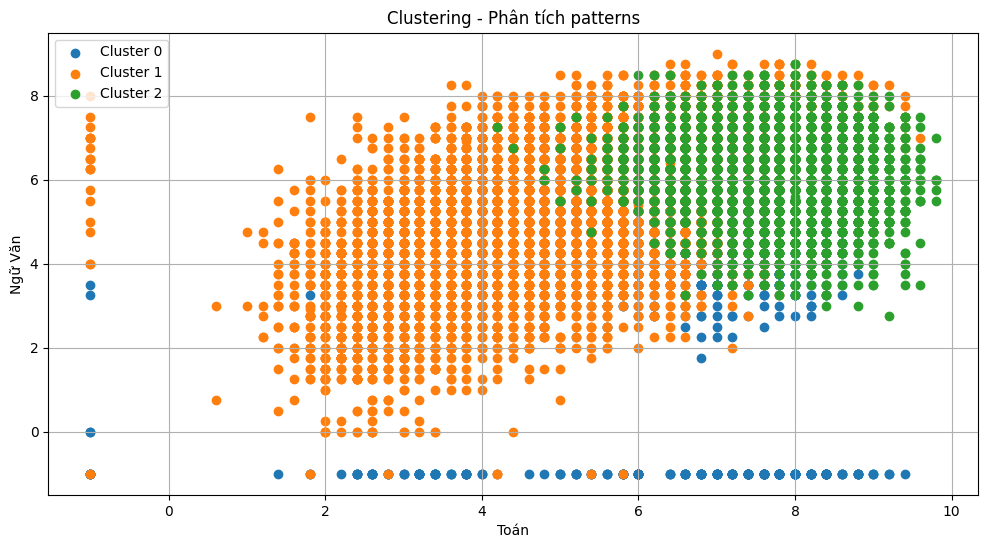

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[list_of_subjects].dropna())

# Áp dụng K-Means clustering
n_clusters = 3  # Số cụm, bạn có thể điều chỉnh
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Thêm kết quả clustering vào DataFrame
df_clean['Cluster'] = clusters

# Hiển thị số lượng mẫu trong mỗi cụm
print(df_clean['Cluster'].value_counts())

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(12, 6))
for cluster in range(n_clusters):
    cluster_data = df_clean[df_clean['Cluster'] == cluster]
    plt.scatter(cluster_data['Toan'], cluster_data['Ngu Van'], label=f"Cluster {cluster}")
plt.title("Clustering - Phân tích patterns")
plt.xlabel("Toán")
plt.ylabel("Ngữ Văn")
plt.legend()
plt.grid(True)
plt.show()

        - Có phân tích tương quan dựa vào các phương pháp Machine Learning 

Phân tích tương quan bằng Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Biến mục tiêu (target) và các đặc trưng (features)
target = 'Toan'  # Ví dụ: phân tích tương quan với điểm Toán
features = [col for col in list_of_subjects if col != target]

# Loại bỏ NaN và chuẩn bị dữ liệu
df_clean = df_clean.dropna(subset=[target])  # Loại bỏ các hàng có NaN ở cột mục tiêu
X = df_clean[features]
y = df_clean[target]

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Lấy giá trị feature importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Hiển thị kết quả
print(importance_df)

# Vẽ biểu đồ mức độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance - Phân tích tương quan")
plt.xlabel("Mức độ quan trọng")
plt.ylabel("Đặc trưng")
plt.gca().invert_yaxis()  # Đảo ngược trục y để đặc trưng quan trọng nhất ở trên cùng
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Phân tích tương quan bằng Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Huấn luyện mô hình Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)

# Lấy giá trị feature importance
gb_feature_importances = gb_model.feature_importances_
gb_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': gb_feature_importances
}).sort_values(by='Importance', ascending=False)

# Hiển thị kết quả
print(gb_importance_df)

# Vẽ biểu đồ mức độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.barh(gb_importance_df['Feature'], gb_importance_df['Importance'], color='lightcoral')
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Mức độ quan trọng")
plt.ylabel("Đặc trưng")
plt.gca().invert_yaxis()  # Đảo ngược trục y để đặc trưng quan trọng nhất ở trên cùng
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()